In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, r2_score, classification_report
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("EDA-HEALTHCARE.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
cols = ["Gender", "Neighbourhood", "Scholarship", "Hipertension",	"Diabetes",	"Alcoholism",	"Handcap",	"SMS_received",	"No-show"]

for col in cols:
    print(col + ":")
    print(df[col].unique())

Gender:
['F' 'M']
Neighbourhood:
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'ILH

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
print("\nMean Age:", df['Age'].mean())
print("Median Age:", df['Age'].median())
print("Mode Age:", df['Age'].mode()[0])


Mean Age: 37.08887421173107
Median Age: 37.0
Mode Age: 0


In [9]:
print("\nAge Variance:", df['Age'].var())
print("Age Standard Deviation:", df['Age'].std())


Age Variance: 534.0815734634219
Age Standard Deviation: 23.110204963682644


In [10]:
print("\nSkewness of Age:", df['Age'].skew())
print("Kurtosis of Age:", df['Age'].kurtosis())


Skewness of Age: 0.12165801789597985
Kurtosis of Age: -0.952267394656098


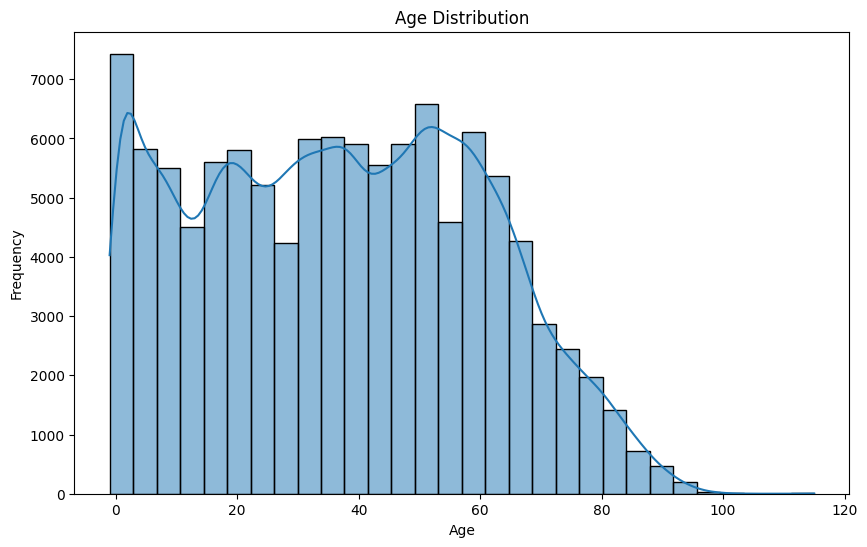

In [11]:
# Histogram for Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

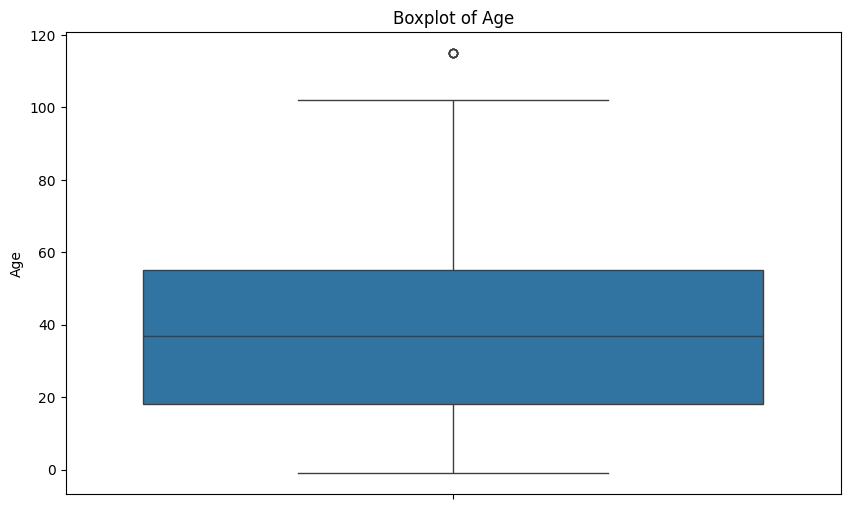

In [12]:
# Boxplot for Age (Detecting Outliers)
plt.figure(figsize=(10,6))
sns.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.show()

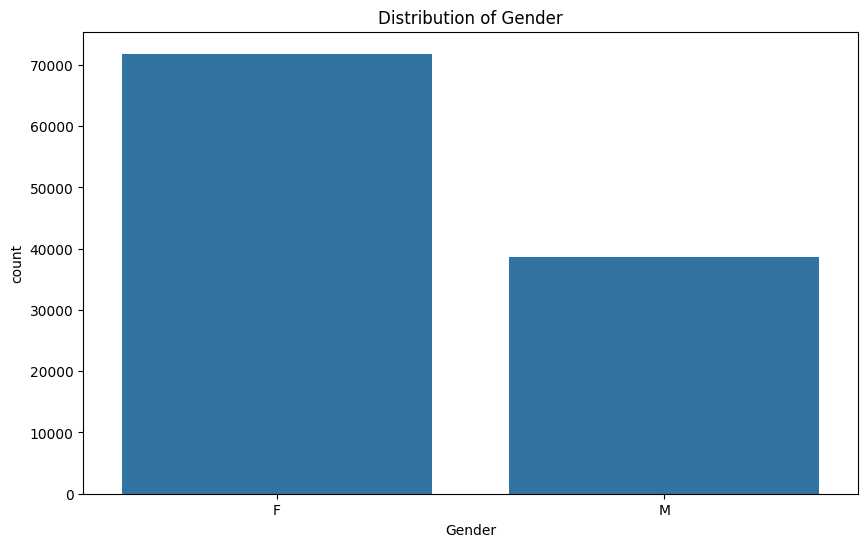

In [13]:
# Distribution of categorical features (e.g., Gender, Scholarship, No-show)
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

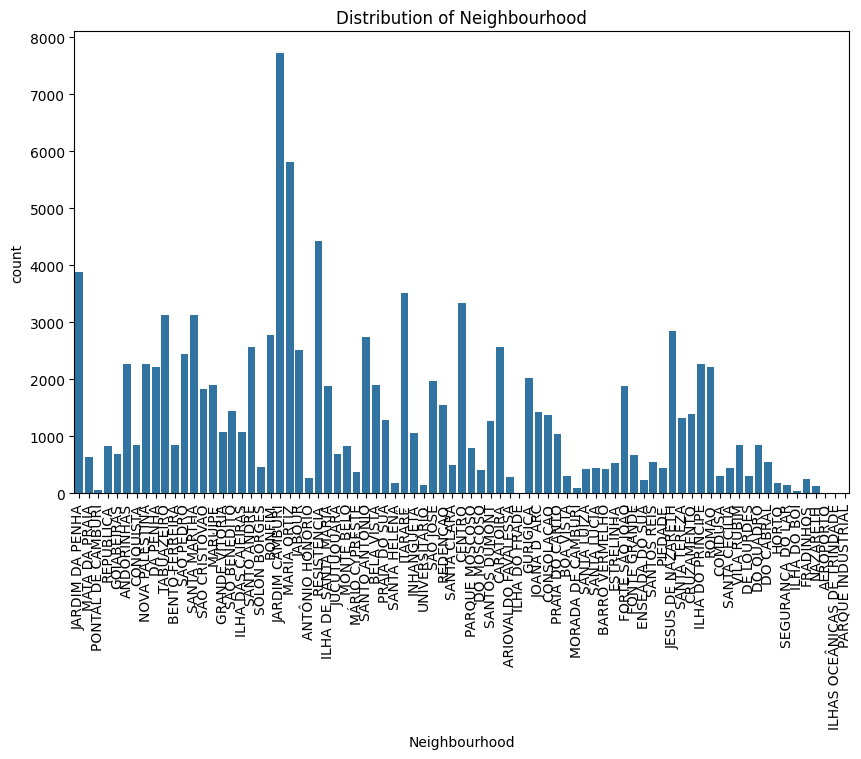

In [14]:
# Distribution of categorical features (e.g., Gender, Scholarship, No-show)
plt.figure(figsize=(10,6))
sns.countplot(x='Neighbourhood', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Neighbourhood')
plt.show()

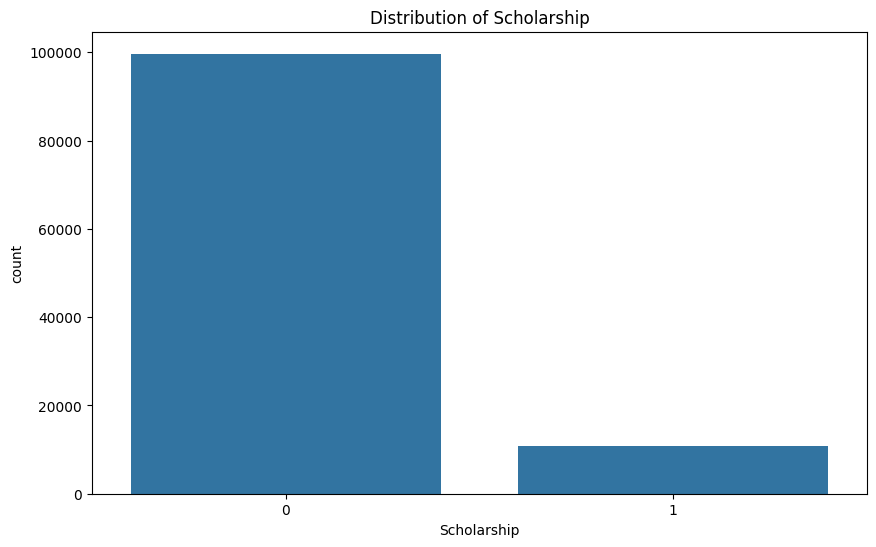

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Scholarship', data=df)
plt.title('Distribution of Scholarship')
plt.show()

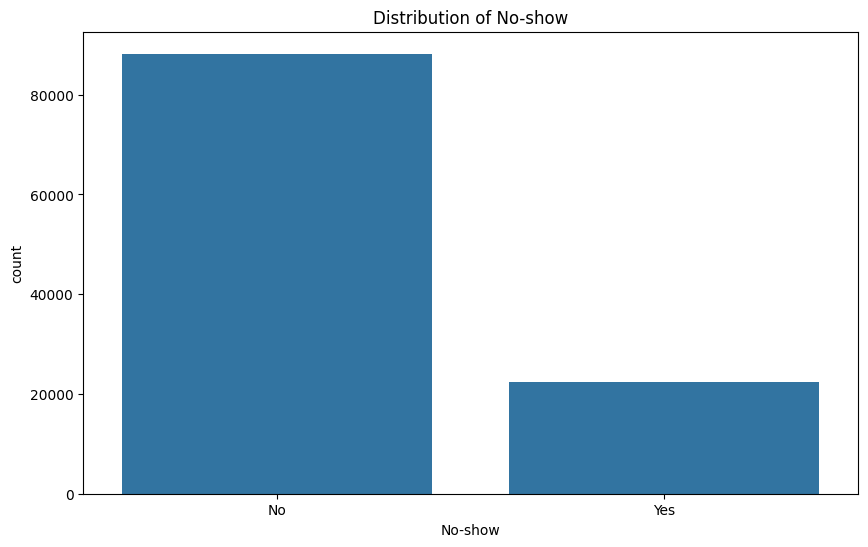

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='No-show', data=df)
plt.title('Distribution of No-show')
plt.show()

In [17]:
# Crosstab for Gender vs No-show
print("\nCrosstab between Gender and No-show:")
print(pd.crosstab(df['Gender'], df['No-show']))


Crosstab between Gender and No-show:
No-show     No    Yes
Gender               
F        57246  14594
M        30962   7725


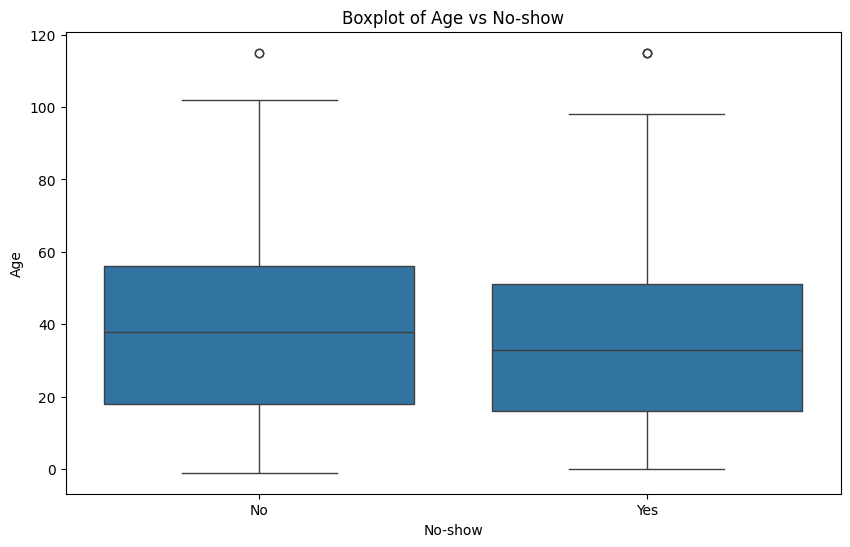

In [18]:
# Boxplot of Age vs No-show
plt.figure(figsize=(10,6))
sns.boxplot(x='No-show', y='Age', data=df)
plt.title('Boxplot of Age vs No-show')
plt.show()

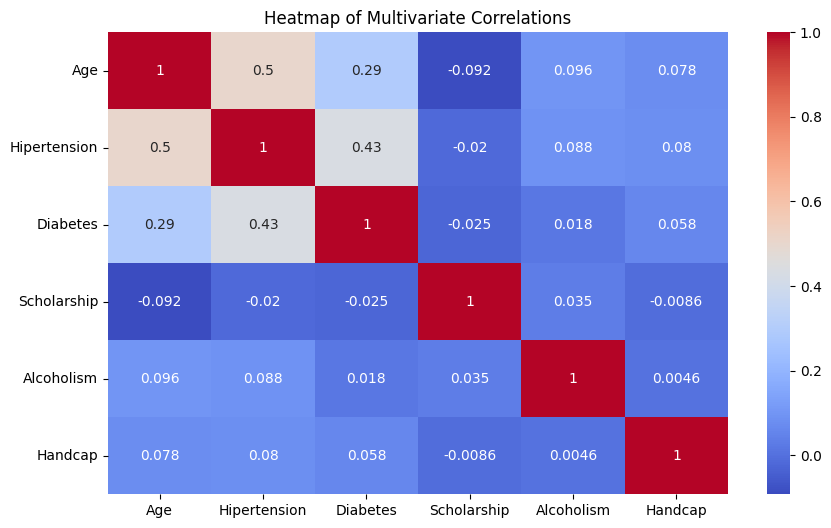

In [19]:
# Heatmap of Age, Hypertension, Diabetes, Scholarship, Alcoholism, Handicap
plt.figure(figsize=(10,6))
sns.heatmap(df[['Age', 'Hipertension', 'Diabetes', 'Scholarship', 'Alcoholism', 'Handcap']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Multivariate Correlations')
plt.show()

In [20]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
# Convert columns to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Calculate the difference and create a new column
df['Diff'] = (df['ScheduledDay'] - df['AppointmentDay']).abs().dt.total_seconds().astype(int)/3600

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Diff
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18.635556
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16.140833
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,16.317778
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17.491944
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16.123056


In [22]:
df.drop(columns=["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"], inplace=True)

In [23]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Diff
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18.635556
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16.140833
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,16.317778
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17.491944
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16.123056


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Neighbourhood'] = label_encoder.fit_transform(df['Neighbourhood'])
df['No-show'] = label_encoder.fit_transform(df['No-show'])

In [25]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Diff
0,0,62,39,0,1,0,0,0,0,0,18.635556
1,1,56,39,0,0,0,0,0,0,0,16.140833
2,0,62,45,0,0,0,0,0,0,0,16.317778
3,0,8,54,0,0,0,0,0,0,0,17.491944
4,0,56,39,0,1,1,0,0,0,0,16.123056


In [26]:
X = df.drop(columns=["No-show"])
y = df["No-show"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [28]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

c:\Users\Nishant\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred_log = logistic_regression_model.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17669
           1       0.31      0.01      0.03      4437

    accuracy                           0.80     22106
   macro avg       0.55      0.50      0.46     22106
weighted avg       0.70      0.80      0.71     22106



In [31]:
accuracy = logistic_regression_model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [32]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# Initialize and train Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       0.59      0.01      0.01      4437

    accuracy                           0.80     22106
   macro avg       0.69      0.50      0.45     22106
weighted avg       0.76      0.80      0.71     22106



In [35]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(gb_classifier, X_train, y_train, cv =10)
cv_score.mean()

np.float64(0.797717742131244)